# Primary Jupyter python script for analysis of BAG file data from IGVC runs. Made by 2LT John Oberholtzer
#Updated 03JUN2016

# NOTE: If a cell shows In [*] it has not completing processing, once a number replaces the * it is complete. If you
# running the top cells of this code, it may take a few minutes to process the bag files. Once you have initially parsed
# the bag files there is no need to rerun these cells. 

#Checklist for operation:
#1. Change "Suffix" to appropriate ending from runs.
#2. Change the booleans on the FLAG list below to correspond with which BAG files are available. Adjust as necessary.
#3. Comment or otherwise disable any tests you do not wish to run in their corresponding cells.
#4. Click Cells>Run All to execute


In [90]:
#This file will require updating if rostopics are moved from one bag file to another as the references are hardcoded.
import matplotlib
import csv
import sys
import ast
import os
import tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import math
from datetime import datetime
from struct import *
from mpl_toolkits.mplot3d import Axes3D
from LatLongUTMconversion import LLtoUTM
csv.field_size_limit(sys.maxsize)
#matplotlib.use('Agg')
%matplotlib nbagg
pylab.rcParams['figure.figsize'] = 15, 8  # that's default image size for this interactive session

#Every BAG file should have this suffix. Example: other_2016-05-26-10-34-51.bag
#If some are off by one number, rename them to fit the format.
suffix = "_2016-06-06-09-21-24"
suffix = "2017-04-14-17-36-55"
#suffix = "2017-04-19-19-21-34"

#The folder the BAG files are in should be named as RUN + the suffix. Example: RUN_2016-05-26-10-34-51
#bagfolder = "RUN" + suffix + "/"
bagfolder = "Data/square/"

bagfile_other = suffix + ".bag"
#bagfile_other = "other"+ suffix + ".bag"
bagfile_camera = "camera"+ suffix + ".bag"
bagfile_pointcloud = "pointcloud"+ suffix + ".bag"

#Following Booleans are for whether or not certain BAG files are present. Hardcoding the booleans here
#will save time by not running the .bag to .csv conversion on the selected files.
FLAG_other = True
FLAG_camera = False
FLAG_pointcloud = False

print("Setup Finished")

Setup Finished


In [88]:
#CONVERSION FROM .BAG to .CSV, attempts to check each bagfile accordingly.
#If aware that .BAG files are not present, you can optionally manually uncheck the flags from the above cell,
#although the code will automatically check and set the flags to False where .BAG files are not present.


if (os.path.isfile(bagfolder+bagfile_other) == False):
    FLAG_other = False
    print("File not found: other" + suffix + ".bag")
    print("Looking for: " + bagfolder+bagfile_other)
    
if (os.path.isfile(bagfolder+bagfile_camera) == False):
    FLAG_camera = False
    print("File not found: camera" + suffix + ".bag")
    
if (os.path.isfile(bagfolder+bagfile_pointcloud) == False):
    FLAG_pointcloud = False
    print("File not found: pointcloud" + suffix + ".bag")

if FLAG_other == True:
    try:
        %run bag2csv_v2.py $bagfolder $bagfile_other
        print("Other: " + str(FLAG_other))
    except Exception:
        FLAG_other = False
        pass
        
if FLAG_camera == True:
    try:
        %run bag2csv_v2.py $bagfolder $bagfile_camera
        print("Camera: " + str(FLAG_camera))
    except Exception:
        FLAG_imudata = False
        pass
    
if FLAG_pointcloud == True:
    try:
        %run bag2csv_v2.py $bagfolder $bagfile_pointcloud
        print("Pointcloud: " + str(FLAG_pointcloud))
    except Exception:
        FLAG_pointcloud = False
        pass

File not found: camera2017-04-19-19-21-34.bag
File not found: pointcloud2017-04-19-19-21-34.bag
reading only 1 bagfile: 2017-04-19-19-21-34.bag
reading file 1 of  1: 2017-04-19-19-21-34.bag
2017-04-19-19-21-34.bag
Done reading all 1 bag files.
Other: True


In [ ]:
###  ======================================================================
###  NO NEED TO RERUN THE CODE ABOVE HERE if the bag files have not changed
###  ======================================================================

In [3]:
#White Line Processing (RUN IF USING ANALYSIS)

#DISABLED
#if FLAG_other == True:
if False:
    linescsvarray = []
    with open(bagfolder + bagfile_other[:-4] + "/_slash_vision3D_slash_lines.csv",'rb') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            linescsvarray.append(row)
    linescolumnnames = linescsvarray.pop(0)        
        
    linesdataarray = []
    for row in linescsvarray:
        linesdataarray.append(ast.literal_eval(row[29]))

    rawlinespoints = linesdataarray[0]
    linespoints = [rawlinespoints[x:x+32] for x in range(0, len(rawlinespoints),32)]
    
    lineslist_x = []
    lineslist_y = []
    lineslist_z = []

    for lines_increment in range(0,len(linespoints)):
        lines_transition = str(bytearray(linespoints[lines_increment]))
        lines_values = unpack('ffffffff',lines_transition)
        lineslist_x.append(lines_values[0])
        lineslist_y.append(lines_values[1])
        lineslist_z.append(lines_values[2])

In [4]:
#Red3D Processing (RUN IF USING ANALYSIS)

#DISABLED
#if FLAG_other == True:
if False:
    redcsvarray = []
    with open(bagfolder + bagfile_other[:-4] + "/_slash_vision3D_slash_red.csv",'rb') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            redcsvarray.append(row)
    redcolumnnames = redcsvarray.pop(0)        
        
    reddataarray = []
    for row in redcsvarray:
        reddataarray.append(ast.literal_eval(row[29]))

    rawredpoints = reddataarray[0]
    redpoints = [rawredpoints[x:x+32] for x in range(0, len(rawredpoints),32)]
    
    redlist_x = []
    redlist_y = []
    redlist_z = []

    for red_increment in range(0,len(redpoints)):
        red_transition = str(bytearray(redpoints[red_increment]))
        red_values = unpack('ffffffff',red_transition)
        redlist_x.append(lines_values[0])
        redlist_y.append(lines_values[1])
        redlist_z.append(lines_values[2])

In [5]:
#Blue3D Processing (RUN IF USING ANALYSIS)

#DISABLED
#if FLAG_other == True:
if False:
    bluecsvarray = []
    with open(bagfolder + bagfile_other[:-4] + "/_slash_vision3D_slash_blue.csv",'rb') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            bluecsvarray.append(row)
    bluecolumnnames = bluecsvarray.pop(0)        
        
    bluedataarray = []
    for row in bluecsvarray:
        bluedataarray.append(ast.literal_eval(row[29]))

    rawbluepoints = bluedataarray[0]
    bluepoints = [rawbluepoints[x:x+32] for x in range(0, len(rawbluepoints),32)]
    
    bluelist_x = []
    bluelist_y = []
    bluelist_z = []

    for blue_increment in range(0,len(bluepoints)):
        blue_transition = str(bytearray(bluepoints[blue_increment]))
        blue_values = unpack('ffffffff',blue_transition)
        bluelist_x.append(lines_values[0])
        bluelist_y.append(lines_values[1])
        bluelist_z.append(lines_values[2])

In [6]:
#GPS AND TF PROCESSING (RUN IF USING ANALYSIS)
if FLAG_other == True:
    TFcsvarray = []
    with open(bagfolder + bagfile_other[:-4] + "/_slash_tf.csv",'rb') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            TFcsvarray.append(row)
    TFcolumnnames = TFcsvarray.pop(0)
    TFdataex = TFcsvarray[0]
    tx= []
    ty= []
    tz= []
    for row in TFcsvarray:
        tx.append(row[11])
        ty.append(row[12])
        tz.append(row[13])
        
    print TFcolumnnames
    print "\n"
    print TFdataex
    print "\n"
    print "\n"
    print "\n"
    
if FLAG_other == True:
    GPScsvarray = []
    with open(bagfolder + bagfile_other[:-4] + "/_slash_cns5000_slash_fix.csv",'rb') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            GPScsvarray.append(row)
    GPScolumnnames = GPScsvarray.pop(0)
    GPSdataex = GPScsvarray[0]
    
    print GPScolumnnames
    print "\n"
    print GPSdataex
    
    (initZone,iE,iN)=LLtoUTM(23, float(GPSdataex[10]),float(GPSdataex[11]))
    print GPSdataex[10]
    print GPSdataex[11]
    print iE
    print iN
    
    lat= []
    lon= []
    alt= []
    eastingList = []
    northingList = []
    TeastingList = []
    TnorthingList = []
    for row in GPScsvarray:
        lat.append(row[10])
        lon.append(row[11])
        alt.append(row[12])
        
        (initZone,initEasting,initNorthing)=LLtoUTM(23, float(row[10]),float(row[11]))
        eastingList.append(initEasting)
        northingList.append(initNorthing)
        
        TrueEasting = (initEasting - 320191.284048)
        TrueNorthing = (initNorthing - 4727391.526)
        TeastingList.append(TrueEasting)
        TnorthingList.append(TrueNorthing)

    print "test"
    (zZ,zE,zN)=LLtoUTM(23, 42.677989,-83.1945959)
    print "\n"
    print zE
    print zN
    print "endtest"

['rosbagTimestamp', 'transforms', '-', 'header', 'seq', 'stamp', 'secs', 'nsecs', 'frame_id', 'child_frame_id', 'transform', 'translation', 'x', 'y', 'z', 'rotation', 'x', 'y', 'z', 'w']


['1492205815390582294', '', '', '0', '', '1492205815', '285913944', 'odom', 'base_link', '', '', '-0.0499689665115', '0.049212101799', '0.0', '', '0.0', '0.0', '0.686483366148', '0.727145506761']






['rosbagTimestamp', 'header', 'seq', 'stamp', 'secs', 'nsecs', 'frame_id', 'status', 'status', 'service', 'latitude', 'longitude', 'altitude', 'position_covariance', 'position_covariance_type']


['1492205815903542761', '', '157', '', '1492205815', '903234004', 'cns5000_frame', '', '0', '0', '41.3906986386', '-73.9532060474', '-6.5166', '[0.01, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 999.0]', '1']
41.3906986386
-73.9532060474
587515.686835
4582658.41663
test


320187.205456
4727392.02088
endtest


In [21]:
#ODOMETRY 
if FLAG_other == True:
    ODOMcsvarray = []
    with open(bagfolder + bagfile_other[:-4] + "/_slash_odometry_slash_filtered.csv",'rb') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            ODOMcsvarray.append(row)
    ODOMcolumnnames = ODOMcsvarray.pop(0)
    ODOMdataex = ODOMcsvarray[0]
    odfx= []
    odfy= []
    odfz= []
    for row in ODOMcsvarray:
        odfx.append(row[11])
        odfy.append(row[12])
        odfz.append(row[13])
    
    print ODOMcolumnnames
    print "\n"
    print ODOMdataex

['rosbagTimestamp', 'header', 'seq', 'stamp', 'secs', 'nsecs', 'frame_id', 'child_frame_id', 'pose', 'pose', 'position', 'x', 'y', 'z', 'orientation', 'x', 'y', 'z', 'w', 'covariance', 'twist', 'twist', 'linear', 'x', 'y', 'z', 'angular', 'x', 'y', 'z', 'covariance']


['1492205815433208316', '', '4700', '', '1492205815', '385844946', 'odom', 'base_link', '', '', '', '-0.0499694308201', '0.0492121223291', '0.0', '', '0.0', '0.0', '0.690968435873', '0.722884929036', '[0.19886657852068673, 6.062104736563023e-11, 0.0, 0.0, 0.0, -2.426705936063969e-17, 6.062104769347205e-11, 0.198866578513194, 0.0, 0.0, 0.0, -5.430271633213094e-16, 0.0, 0.0, 4.950949771164363e-07, 4.467888216462373e-20, -2.3167026751393225e-27, 0.0, 0.0, 0.0, 4.4678882164623754e-20, 4.999833250480056e-07, 7.208643245724013e-36, 0.0, 0.0, 0.0, -2.3167026751393218e-27, -7.166482608640821e-36, 4.999833250480056e-07, 0.0, -2.4267059360639694e-17, -5.430271633213095e-16, 0.0, 0.0, 0.0, 9.98006851219477e-07]', '', '', '', '0.0',

In [8]:
#ODOMETRY - GPS

#DISABLED
#if FLAG_other == True:
if True:
    ODOMGPScsvarray = []
    with open(bagfolder + bagfile_other[:-4] + "/_slash_odometry_slash_gps.csv",'rb') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            ODOMGPScsvarray.append(row)
    ODOMGPScolumnnames = ODOMGPScsvarray.pop(0)
    ODOMGPSdataex = ODOMGPScsvarray[50]
    odgx= []
    odgy= []
    odgz= []
    for row in ODOMGPScsvarray:
        odgx.append(row[11])
        odgy.append(row[12])
        odgz.append(row[13])
    
    print ODOMGPScolumnnames
    print "\n"
    print ODOMGPSdataex    

['rosbagTimestamp', 'header', 'seq', 'stamp', 'secs', 'nsecs', 'frame_id', 'child_frame_id', 'pose', 'pose', 'position', 'x', 'y', 'z', 'orientation', 'x', 'y', 'z', 'w', 'covariance', 'twist', 'twist', 'linear', 'x', 'y', 'z', 'angular', 'x', 'y', 'z', 'covariance']


['1492205865918105236', '', '205', '', '1492205865', '905715942', 'map', "''", '', '', '', '-33.7729314752', '-6.45667751918', '0.0', '', '0.0', '-0.0', '0.707108079859', '0.707105482511', '[0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 999.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]', '', '', '', '0.0', '0.0', '0.0', '', '0.0', '0.0', '0.0', '[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]']


In [9]:
#VO
if FLAG_other == True:
    VOcsvarray = []
    with open(bagfolder + bagfile_other[:-4] + "/_slash_odometry_slash_filtered_map.csv",'rb') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            VOcsvarray.append(row)
    VOcolumnnames = VOcsvarray.pop(0)
    VOdataex = VOcsvarray[50]
    VOx= []
    VOy= []
    for row in VOcsvarray:
        TrueVOx = (float(row[11]) - 320191.284048)
        TrueVOy = (float(row[12]) - 4727391.526)
        VOx.append(TrueVOx)
        VOy.append(TrueVOy)

    
    print VOcolumnnames
    print "\n"
    print VOdataex
    print "\n"
    print VOx[1]
    print VOy[1]

['rosbagTimestamp', 'header', 'seq', 'stamp', 'secs', 'nsecs', 'frame_id', 'child_frame_id', 'pose', 'pose', 'position', 'x', 'y', 'z', 'orientation', 'x', 'y', 'z', 'w', 'covariance', 'twist', 'twist', 'linear', 'x', 'y', 'z', 'angular', 'x', 'y', 'z', 'covariance']


['1492205816974072364', '', '4746', '', '1492205816', '935099125', 'map', 'base_link', '', '', '', '-9.75121250729', '4.49286085368', '0.0', '', '0.0', '0.0', '0.738941651904', '0.673769422786', '[0.03677226203800498, 7.194403498481952e-16, 0.0, 0.0, 0.0, 4.446915524885324e-13, 7.194405449586964e-16, 0.03677226203800928, 0.0, 0.0, 0.0, 2.7310086563958983e-12, 0.0, 0.0, 4.91173956921395e-07, -6.583200237068751e-18, -2.6994469190957174e-19, 0.0, 0.0, 0.0, -6.583200237068752e-18, 4.999689867618268e-07, -2.013473018303718e-28, 0.0, 0.0, 0.0, -2.699446919095715e-19, -2.013473018337672e-28, 4.999689867618268e-07, 0.0, 4.4469155248853236e-13, 2.7310086563958983e-12, 0.0, 0.0, 0.0, 9.980161831085227e-07]', '', '', '', '4.8367258

In [71]:
#Heading
#DISABLED
#if FLAG_other == True:
if False:
    Hcsvarray = []
    with open(bagfolder + bagfile_other[:-4] + "/_slash_novatel_slash_heading.csv",'rb') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            Hcsvarray.append(row)
    Hcolumnnames = Hcsvarray.pop(0)
    Hcsvarray.pop(0)
    Hcsvarray.pop(0)
    Hcsvarray.pop(0)
    Hdataex = Hcsvarray[0]
    Hz= []
    Hw= []
    for row in Hcsvarray:
        TrueHz = (float(row[16]))
        TrueHw = (float(row[17]))
        Hz.append(TrueHz)
        Hw.append(TrueHw)

    
    print Hcolumnnames
    print "\n"
    print Hdataex
    print "\n"

    print Hz[1]
    print Hw[1]

In [72]:
#IMU Graphing
if True:
    xg_Imuarray = []
    with open(bagfolder + bagfile_other[:-4] + "/_slash_xsens_slash_imu_slash_global.csv",'rb') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            xg_Imuarray.append(row)
    Hcolumnnames = xg_Imuarray.pop(0)
    xg_Imuarray.pop(0)
    xg_Imuarray.pop(0)
    xg_Imuarray.pop(0)
    Hdataex = xg_Imuarray[0]
    xg_rolls=[]
    xg_pitchs=[]
    xg_yaws=[]
    xg_times=[]
            
    print Hcolumnnames
    print "\n"
    print Hdataex
    print "\n"
    for row in xg_Imuarray:
        quaternion = (  row[8],
                        row[9],
                        row[10],
                        row[11])
        euler = tf.transformations.euler_from_quaternion(quaternion)
        xg_rolls.append(euler[0])
        xg_pitchs.append(euler[1])
        xg_yaws.append(euler[2])
        xg_times.append(row[0])
    print xg_rolls[1]
    print xg_pitchs[1]
    print xg_yaws[1]

['rosbagTimestamp', 'header', 'seq', 'stamp', 'secs', 'nsecs', 'frame_id', 'orientation', 'x', 'y', 'z', 'w', 'orientation_covariance', 'angular_velocity', 'x', 'y', 'z', 'angular_velocity_covariance', 'linear_acceleration', 'x', 'y', 'z', 'linear_acceleration_covariance']


['1492205815444622247', '', '4', '', '1492205815', '440845012', 'imu_frame', '', '0.0383999304199', '-0.00839892997843', '-0.0254731943171', '0.99890240749', '[0.017453292519943295, 0.0, 0.0, 0.0, 0.017453292519943295, 0.0, 0.0, 0.0, 0.15707963267948966]', '', '-0.00321527011693', '0.00122788303997', '-0.00578724872321', '[0.0004363323129985824, 0.0, 0.0, 0.0, 0.0004363323129985824, 0.0, 0.0, 0.0, 0.0004363323129985824]', '', '0.00145336287096', '0.00378467375413', '0.0979634076357', '[0.0004, 0.0, 0.0, 0.0, 0.0004, 0.0, 0.0, 0.0, 0.0004]']


0.0775302467236
-0.0153261632421
-0.0425531293984


In [73]:
#IMU Graphing Yaw over time Xsens
if True:
    xr_Imuarray = []
    with open(bagfolder + bagfile_other[:-4] + "/_slash_xsens_slash_imu_slash_data.csv",'rb') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            xr_Imuarray.append(row)
    Hcolumnnames = xr_Imuarray.pop(0)
    xr_Imuarray.pop(0)
    xr_Imuarray.pop(0)
    xr_Imuarray.pop(0)
    Hdataex = xr_Imuarray[0]
    xr_rolls=[]
    xr_pitchs=[]
    xr_yaws=[]
    xr_times=[]
            
    print Hcolumnnames
    print "\n"
    print Hdataex
    print "\n"
    for row in xr_Imuarray:
        quaternion = (  row[8],
                        row[9],
                        row[10],
                        row[11])
        euler = tf.transformations.euler_from_quaternion(quaternion)
        xr_rolls.append(euler[0])
        xr_pitchs.append(euler[1])
        xr_yaws.append(euler[2])
        xr_times.append(row[0])


    print xr_rolls[1]
    print xr_pitchs[1]
    print xr_yaws[1]

['rosbagTimestamp', 'header', 'seq', 'stamp', 'secs', 'nsecs', 'frame_id', 'orientation', 'x', 'y', 'z', 'w', 'orientation_covariance', 'angular_velocity', 'x', 'y', 'z', 'angular_velocity_covariance', 'linear_acceleration', 'x', 'y', 'z', 'linear_acceleration_covariance']


['1492205815390776743', '', '14647', '', '1492205815', '330378055', 'imu_frame', '', '0.0204486455768', '0.00560765340924', '0.62357378006', '0.781476736069', '[0.017453292519943295, 0.0, 0.0, 0.0, 0.017453292519943295, 0.0, 0.0, 0.0, 0.15707963267948966]', '', '-0.00233986764215', '-0.00110790180042', '-0.00202393578365', '[0.0004363323129985824, 0.0, 0.0, 0.0, 0.0004363323129985824, 0.0, 0.0, 0.0, 0.0004363323129985824]', '', '0.00152026163414', '0.00378480483778', '0.0979809314013', '[0.0004, 0.0, 0.0, 0.0, 0.0004, 0.0, 0.0, 0.0, 0.0004]']


0.0389802303188
-0.0167413030042
1.34663066739


In [74]:
#IMU Graphing Yaw over time Xsens
if True:
    cr_Imuarray = []
    with open(bagfolder + bagfile_other[:-4] + "/_slash_cns5000_slash_imu_slash_data.csv",'rb') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            cr_Imuarray.append(row)
    Hcolumnnames = cr_Imuarray.pop(0)
    cr_Imuarray.pop(0)
    cr_Imuarray.pop(0)
    cr_Imuarray.pop(0)
    Hdataex = cr_Imuarray[0]
    cr_rolls=[]
    cr_pitchs=[]
    cr_yaws=[]
    cr_times=[]
            
    print Hcolumnnames
    print "\n"
    print Hdataex
    print "\n"
    for row in cr_Imuarray:
        quaternion = (  row[8],
                        row[9],
                        row[10],
                        row[11])
        euler = tf.transformations.euler_from_quaternion(quaternion)
        cr_rolls.append(euler[0])
        cr_pitchs.append(euler[1])
        cr_yaws.append(euler[2])
        cr_times.append(row[0])


    print cr_rolls[1]
    print cr_pitchs[1]
    print cr_yaws[1]

['rosbagTimestamp', 'header', 'seq', 'stamp', 'secs', 'nsecs', 'frame_id', 'orientation', 'x', 'y', 'z', 'w', 'orientation_covariance', 'angular_velocity', 'x', 'y', 'z', 'angular_velocity_covariance', 'linear_acceleration', 'x', 'y', 'z', 'linear_acceleration_covariance']


['1492205815549377560', '', '15711', '', '1492205815', '545772075', 'cns5000_frame', '', '-0.132004670429', '-0.00814138470295', '0.982478132278', '0.131320997698', '[1e-06, 0.0, 0.0, 0.0, 1e-06, 0.0, 0.0, 0.0, 1e-06]', '', '-2.30341765928e-05', '1.97125882551e-05', '1.5036696368e-05', '[1e-06, 0.0, 0.0, 0.0, 1e-06, 0.0, 0.0, 0.0, 1e-06]', '', '-0.0161257921718', '0.0344499479979', '0.981304273009', '[1e-06, 0.0, 0.0, 0.0, 1e-06, 0.0, 0.0, 0.0, 1e-06]']


-0.0524539095982
0.26017225682
2.86897876417


In [94]:
#IMU Graphing
if True:
    cg_Imuarray = []
    #with open(bagfolder + bagfile_other[:-4] + "/_slash_cns5000_slash_imu_slash_global.csv",'rb') as csvfile:
    with open(bagfolder + bagfile_other[:-4] + "/_slash_simple_slash_global.csv",'rb') as csvfile:
        
        reader = csv.reader(csvfile)
        for row in reader:
            cg_Imuarray.append(row)
    Hcolumnnames = cg_Imuarray.pop(0)
    cg_Imuarray.pop(0)
    cg_Imuarray.pop(0)
    cg_Imuarray.pop(0)
    Hdataex = cg_Imuarray[0]
    cg_rolls=[]
    cg_pitchs=[]
    cg_yaws=[]
    cg_times=[]
            
    print Hcolumnnames
    print "\n"
    print Hdataex
    print "\n"
    for row in cg_Imuarray:
        quaternion = (  row[8],
                        row[9],
                        row[10],
                        row[11])
        euler = tf.transformations.euler_from_quaternion(quaternion)
        cg_rolls.append(euler[0])
        cg_pitchs.append(euler[1])
        cg_yaws.append(euler[2])
        cg_times.append(row[0])


    print cg_rolls[1]
    print cg_pitchs[1]
    print cg_yaws[1]

['rosbagTimestamp', 'header', 'seq', 'stamp', 'secs', 'nsecs', 'frame_id', 'orientation', 'x', 'y', 'z', 'w', 'orientation_covariance', 'angular_velocity', 'x', 'y', 'z', 'angular_velocity_covariance', 'linear_acceleration', 'x', 'y', 'z', 'linear_acceleration_covariance']


['1492644106307689332', '', '4', '', '1492205818', '79315900', 'imu_frame', '', '0.0212653782219', '0.00710260076448', '0.617611706257', '-0.213836431503', '[0.017453292519943295, 0.0, 0.0, 0.0, 0.017453292519943295, 0.0, 0.0, 0.0, 0.15707963267948966]', '', '-0.0146616036072', '0.00906103104353', '0.00368253677152', '[0.0004363323129985824, 0.0, 0.0, 0.0, 0.0004363323129985824, 0.0, 0.0, 0.0, 0.0004363323129985824]', '', '0.000918607693166', '0.0047377734445', '0.0981282740831', '[0.0004, 0.0, 0.0, 0.0, 0.0004, 0.0, 0.0, 0.0, 0.0004]']


-0.000662889920189
-0.0684124744899
-2.47491345788


In [92]:
#IMU Graphing

if True:    
    magneticarray = []
    with open(bagfolder + bagfile_other[:-4] + "/_slash_xsens_slash_magnetic.csv",'rb') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            magneticarray.append(row)
    Hcolumnnames = magneticarray.pop(0)
    magneticarray.pop(0)
    magneticarray.pop(0)
    magneticarray.pop(0)
    Hdataex = magneticarray[0]
    mag_headings = []
    mag_times = []
                
    print Hcolumnnames
    print "\n"
    print Hdataex
    print "\n"
    for row in magneticarray:
        mag_times.append(row[0])
        mag_headings.append(math.atan2(float(row[8]),float(row[9])))
    
    print mag_times[1]
    print mag_headings[1]
    
            

['rosbagTimestamp', 'header', 'seq', 'stamp', 'secs', 'nsecs', 'frame_id', 'vector', 'x', 'y', 'z']


['1492205815553763480', '', '14670', '', '1492205815', '550811052', 'imu_frame', '', '0.198599860072', '-0.0235140491277', '-0.963397979736']


1492205815563260052
1.70424758178


In [83]:
def calcRollAngle(aY,aZ):
    rollAngle = math.atan2(aY,aZ)
    return rollAngle

def calcPitchAngle(aX,aY,aZ,rollAngle):
    pitchAngle = math.atan2(-aX, ((aY * math.sin(rollAngle)) + (aZ * math.cos(rollAngle))))
    return pitchAngle

def tiltCompHeading(mX,mY,mZ,pitchAngle,rollAngle):
    Mx2 = (mX * math.cos(pitchAngle)) + (mZ*math.sin(pitchAngle))
    My2 = (mX * math.sin(rollAngle) * math.sin(pitchAngle)) + mY*math.cos(rollAngle) - (mZ*math.sin(rollAngle)*math.cos(pitchAngle))    
    #Mz2 = (-mX * math.cos(rollAngle)*math.sin(pitchAngle)) + mY*math.sin(rollAngle) + (mZ*math.cos(rollAngle)*math.cos(pitchAngle))    
    compHeading = math.atan2(My2,Mx2)
    return compHeading
    
    
i=0
compHeadings= []
compTimes= []
for row in magneticarray:  
    mX,mY,mZ = float(row[8]),float(row[9]),float(row[10])    
    while(row[0] >= xr_Imuarray[i][0]):
        #use imu with mag
        aX,aY,aZ = tf.transformations.euler_from_quaternion([xr_Imuarray[i][8],xr_Imuarray[i][9],xr_Imuarray[i][10],xr_Imuarray[i][11]]) 
        rollAngle = calcRollAngle(aY,aZ)
        pitchAngle = calcPitchAngle(aX,aY,aZ,rollAngle)
        compHeading = tiltCompHeading(mX,mY,mZ,pitchAngle,rollAngle)
        i+=1
        compHeadings.append(compHeading)
        compTimes.append(row[0])    

In [116]:
if True:    
    compassarray = []
    with open(bagfolder + bagfile_other[:-4] + "/_slash_simple_slash_compass.csv",'rb') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            compassarray.append(row)
    Hcolumnnames = compassarray.pop(0)
    compassarray.pop(0)
    compassarray.pop(0)
    compassarray.pop(0)
    Hdataex = compassarray[0]
    cmp_headings = []
    cmp_times = []    
                    
    print Hcolumnnames
    print "\n"
    print Hdataex
    print "\n"
    deltaT = float(row[0])-float(mag_times[5])
    for row in compassarray:
        cmp_times.append(float(row[0])+deltaT)
        cmp_headings.append((float(row[1])-360.0)*3.141/180)
    
    print cmp_times[1]
    print cmp_headings[1]

['rosbagTimestamp', 'data']


['1492644106307681381', '350.011138916']


1.4930825741e+18
-0.216563616944


<IPython.core.display.Javascript object>


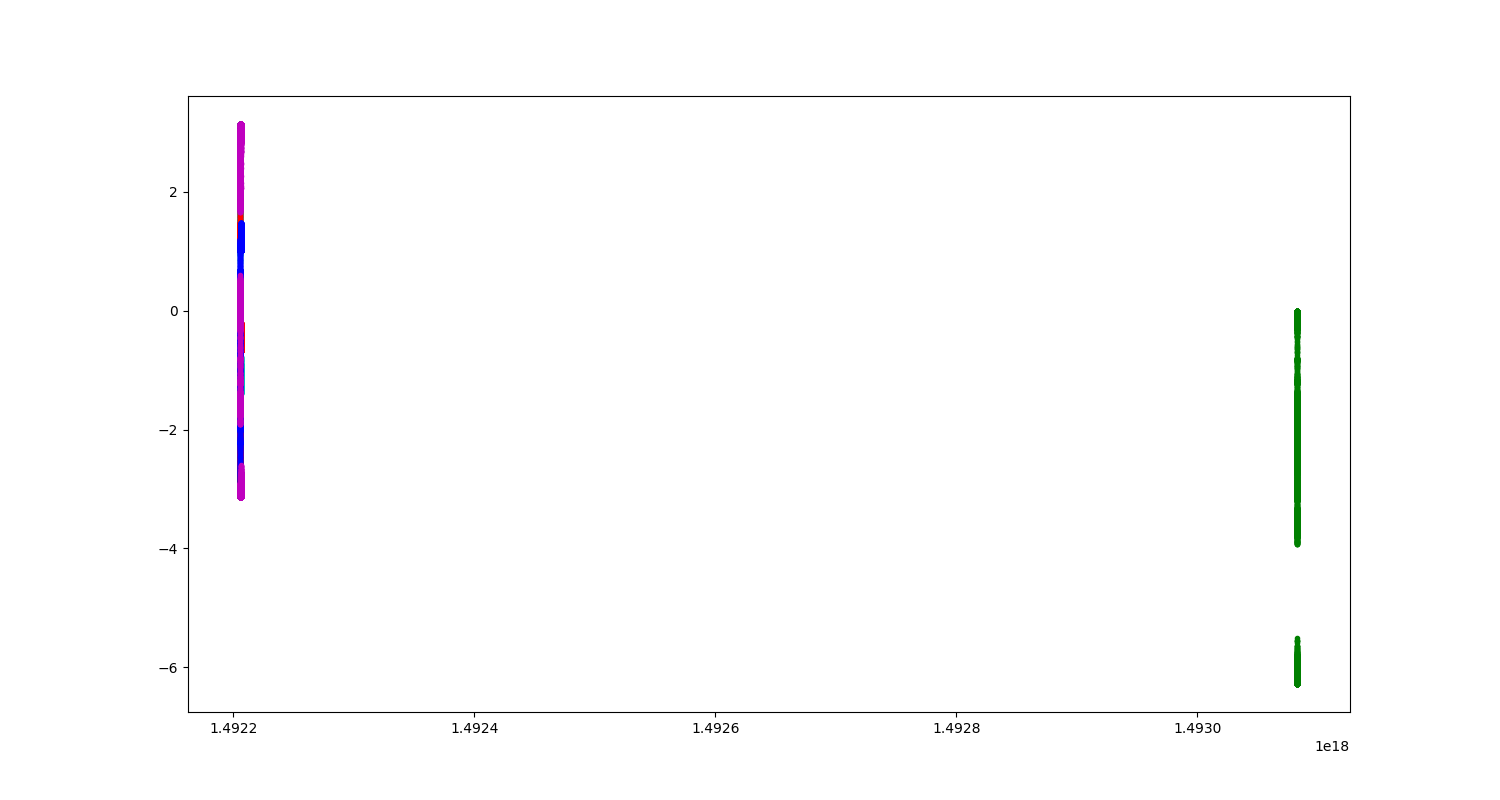

In [117]:
#GPS AND TF 2D GRAPHING FOR LOCATION
#DISABLED
#if FLAG_other == True:
if True:    
    plt.figure(17)
    plt.plot(mag_times,mag_headings, 'c.') 
    plt.plot(xr_times,xr_yaws, 'r.') 
    plt.plot(cmp_times,cmp_headings, 'g.') 
    plt.plot(cr_times,cr_yaws, 'b.') 
    #plt.plot(cg_times,cg_yaws, 'y.') 
    plt.plot(compTimes,compHeadings, 'm.') 
    plt.show()

<IPython.core.display.Javascript object>


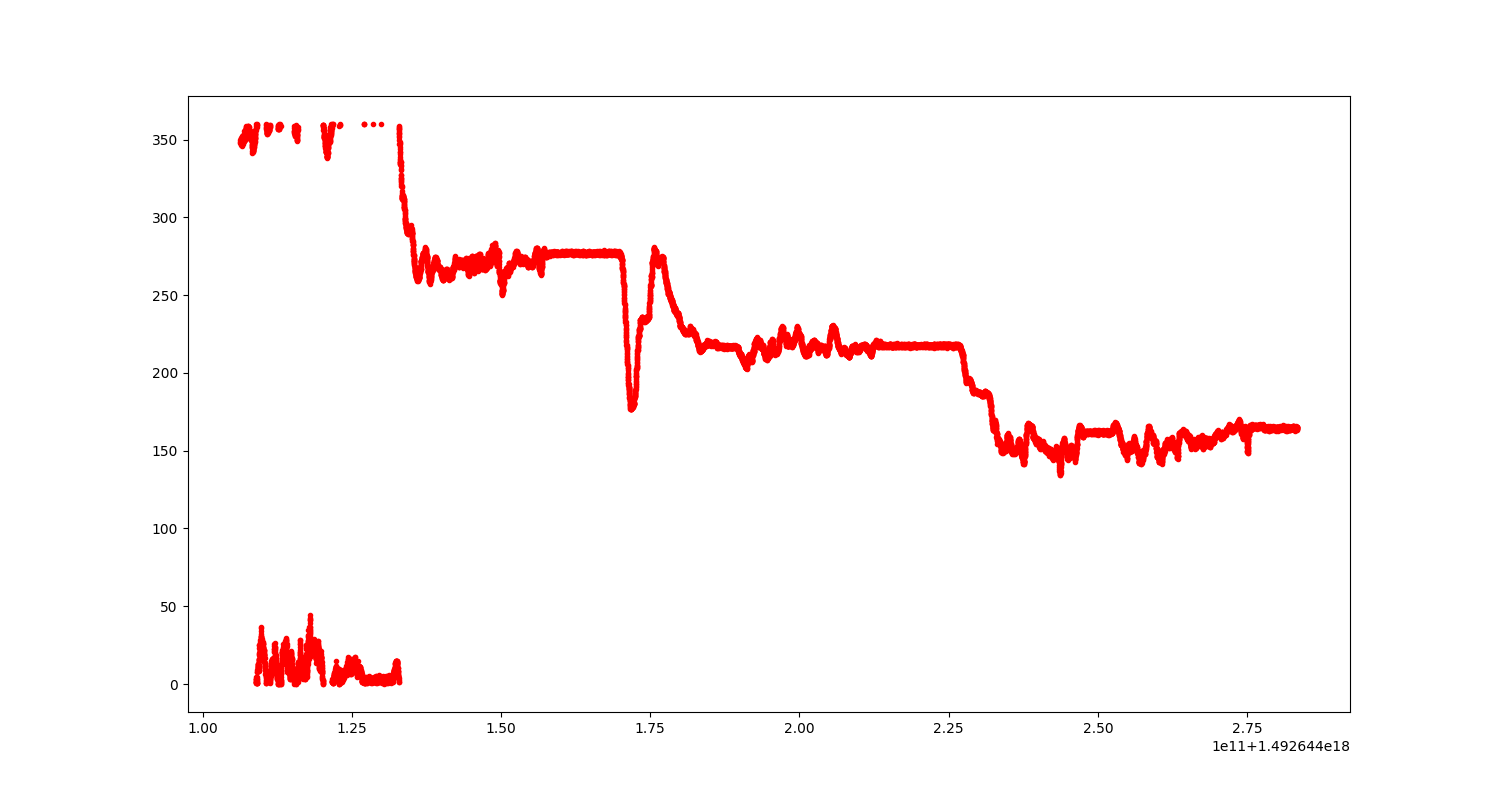

In [99]:
#GPS AND TF 2D GRAPHING FOR LOCATION
#DISABLED
#if FLAG_other == True:
if True:    
    plt.figure(18)
    plt.plot(cmp_times,cmp_headings, 'r.') # odom to baselink transform
    plt.show()
    #plt.plot(lat,lon, 'g^')
    #plt.show()

<IPython.core.display.Javascript object>


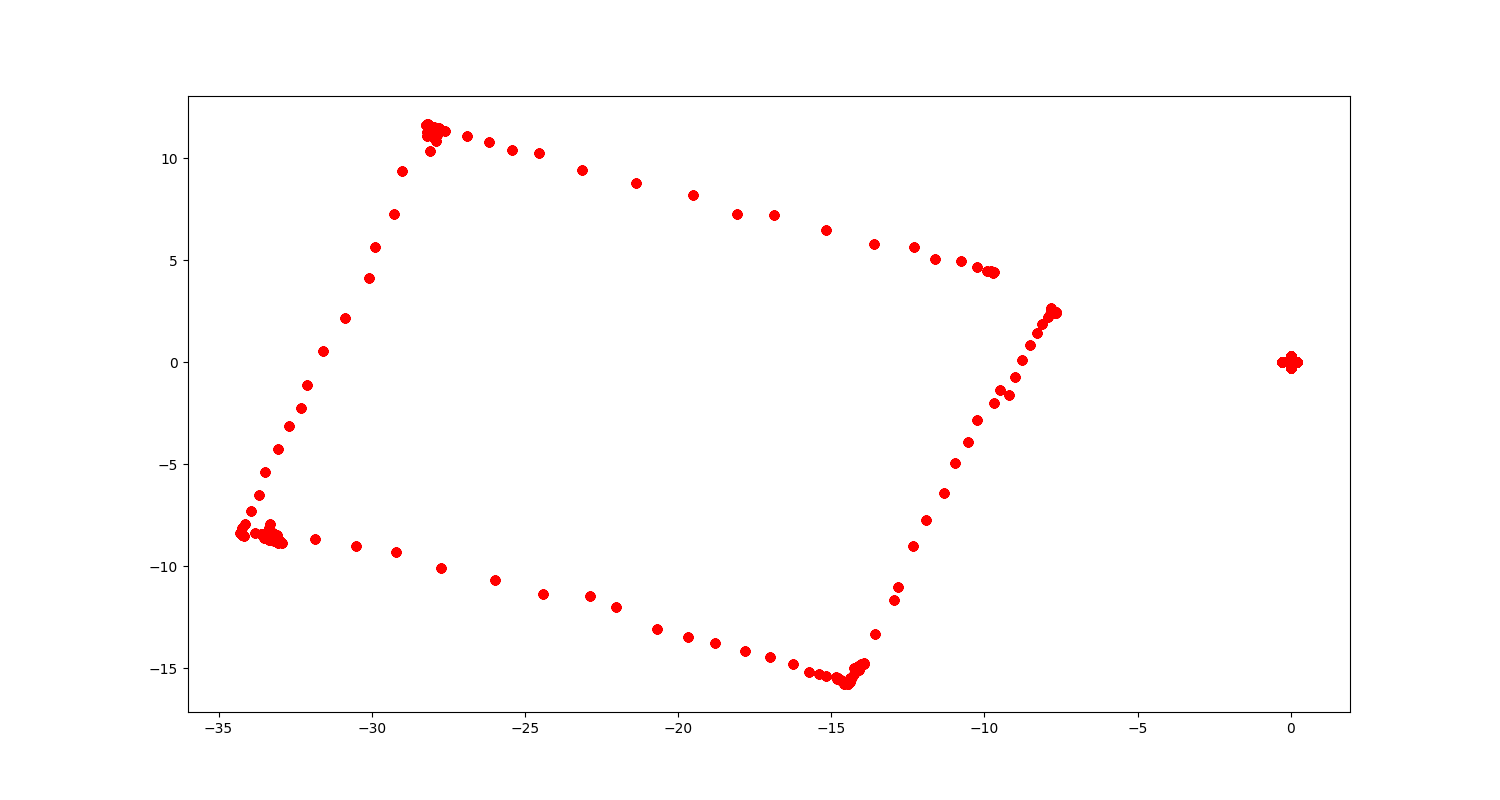

In [18]:
#GPS AND TF 2D GRAPHING FOR LOCATION
#DISABLED
#if FLAG_other == True:
if True:    
    plt.figure(1)
    plt.plot(tx,ty, 'ro') # odom to baselink transform
    plt.show()
    #plt.plot(lat,lon, 'g^')
    #plt.show()

<IPython.core.display.Javascript object>


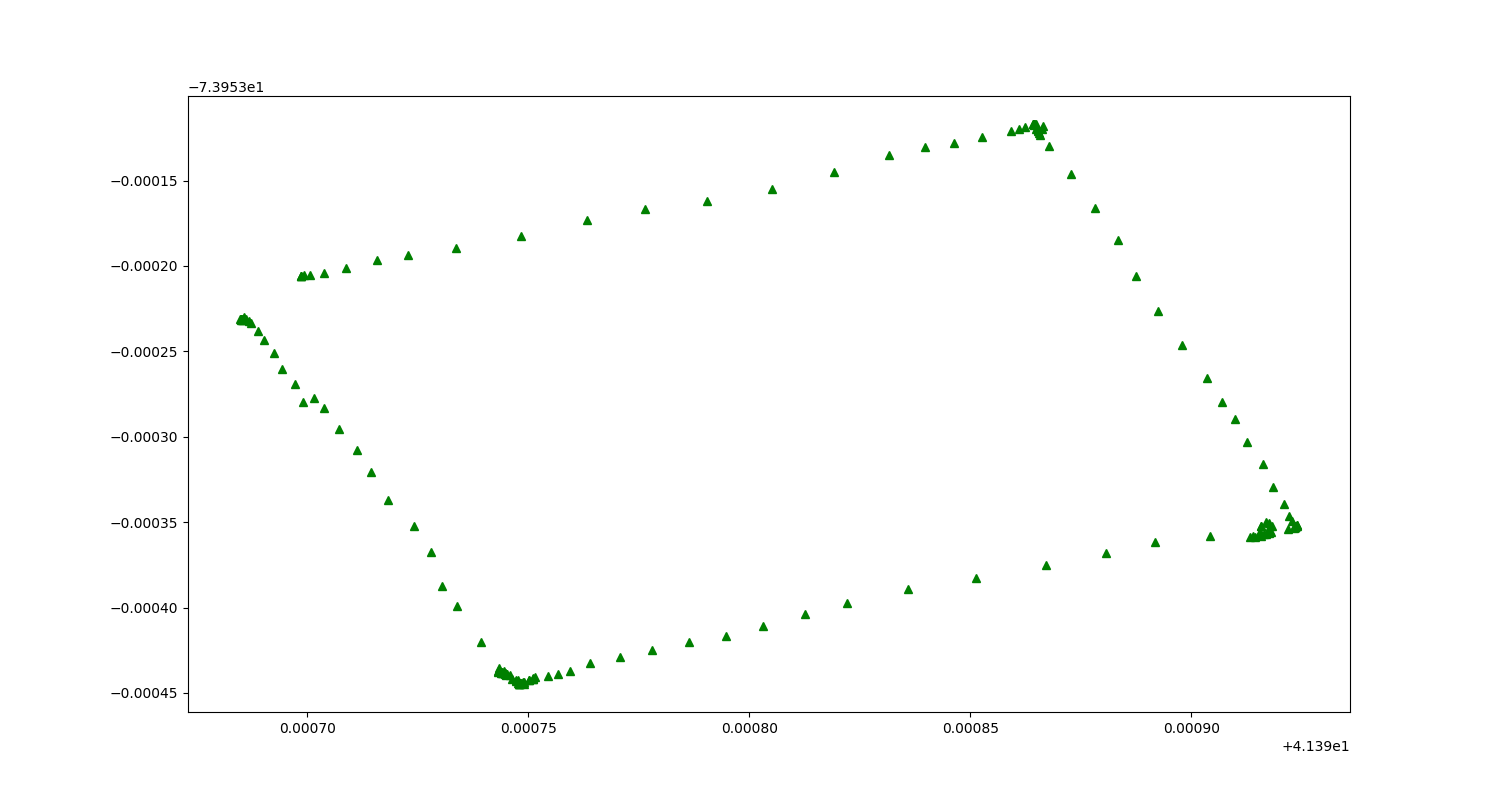

In [19]:
#GPS AND TF 2D GRAPHING FOR LOCATION
#DISABLED
#if FLAG_other == True:
if True:
    plt.figure(2)
    #plt.plot(tx,ty, 'ro') # odom to baselink transform
    #plt.show()
    plt.plot(lat,lon, 'g^')
    plt.show()

<IPython.core.display.Javascript object>


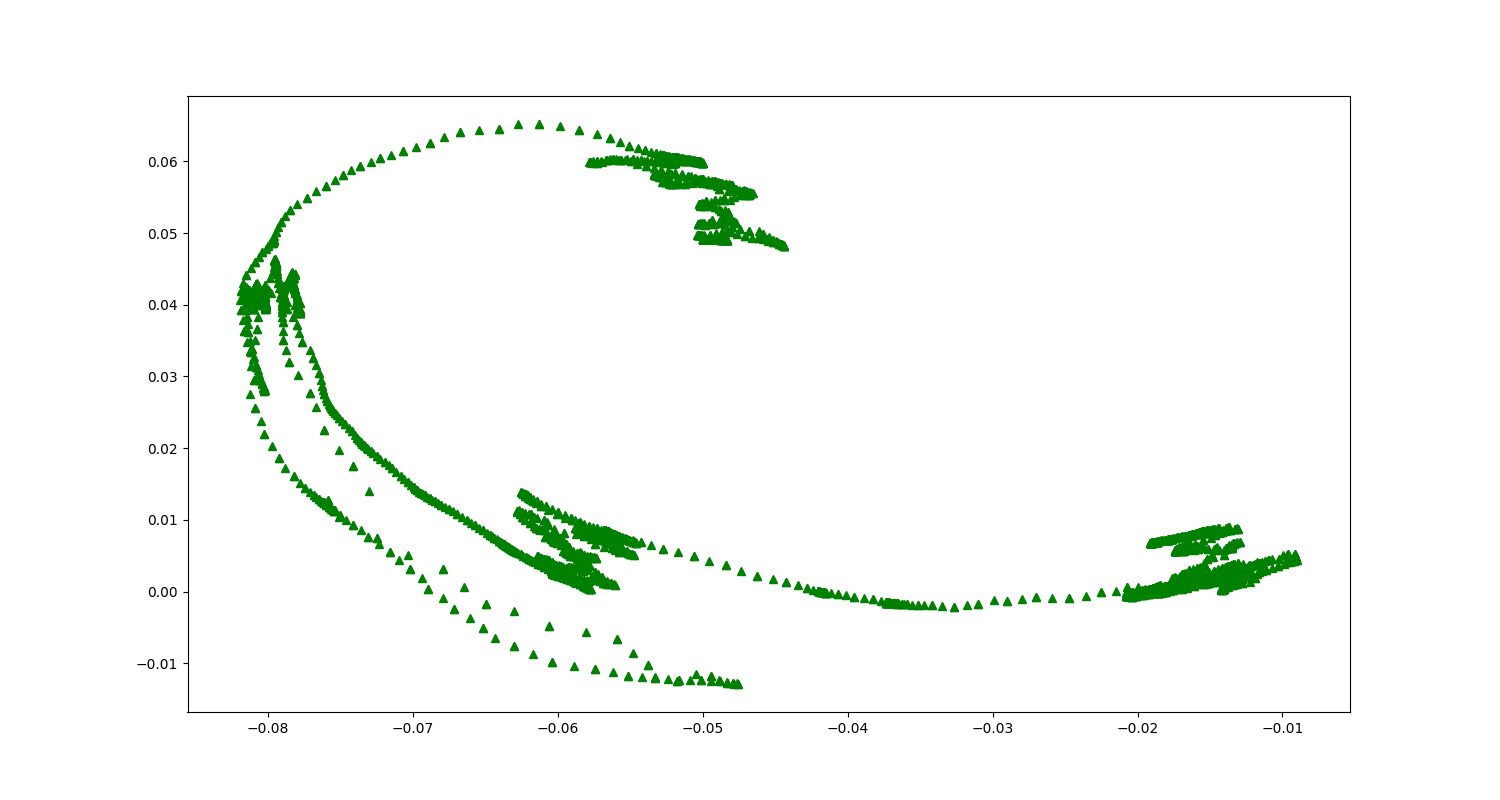

In [22]:
if True:
    plt.figure(3)
    plt.plot(odfx,odfy, 'g^')
    plt.show()

<IPython.core.display.Javascript object>


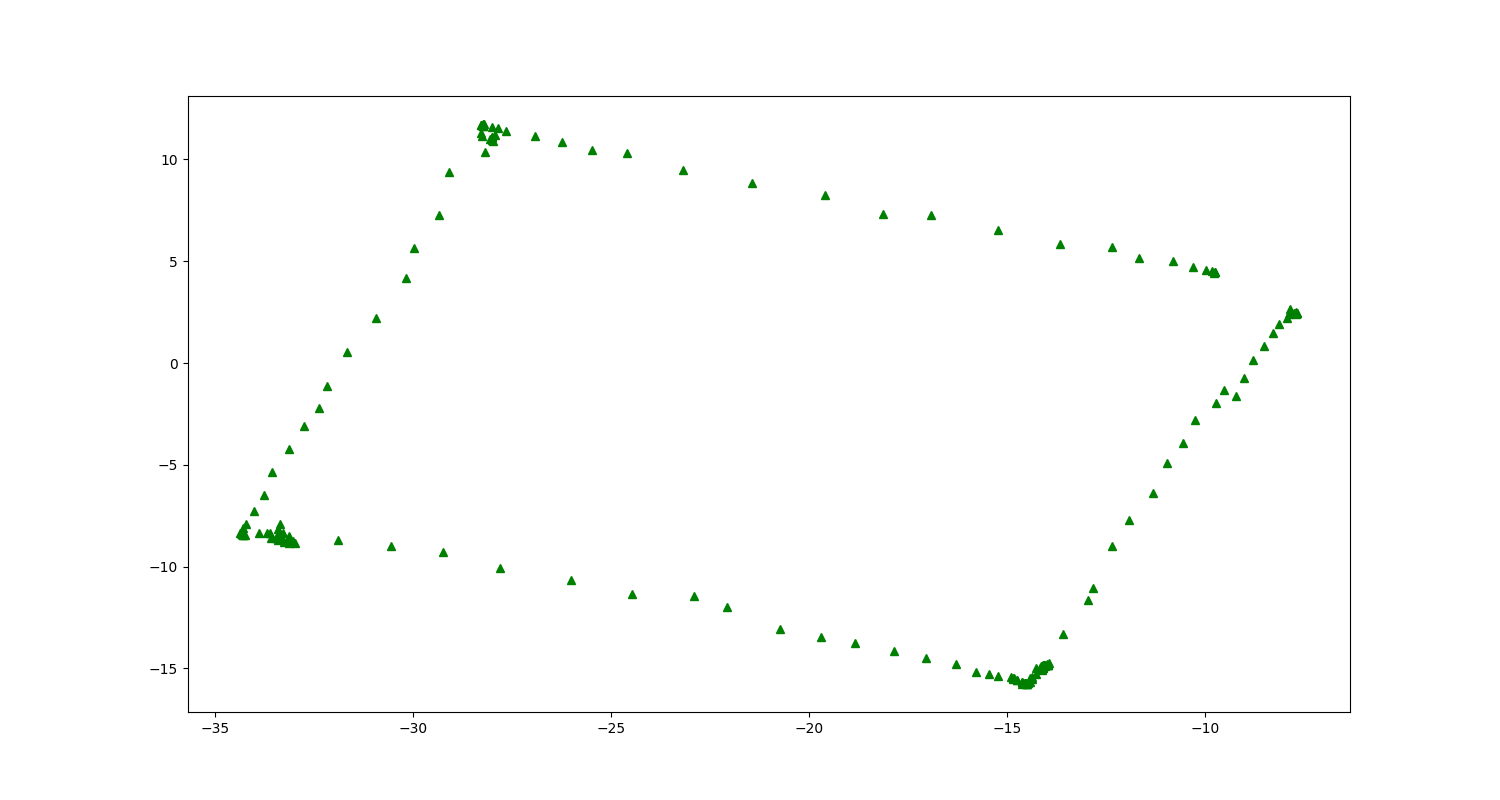

In [23]:
if True:
    plt.figure(4)
    plt.plot(odgx,odgy, 'g^')
    plt.show()

<IPython.core.display.Javascript object>


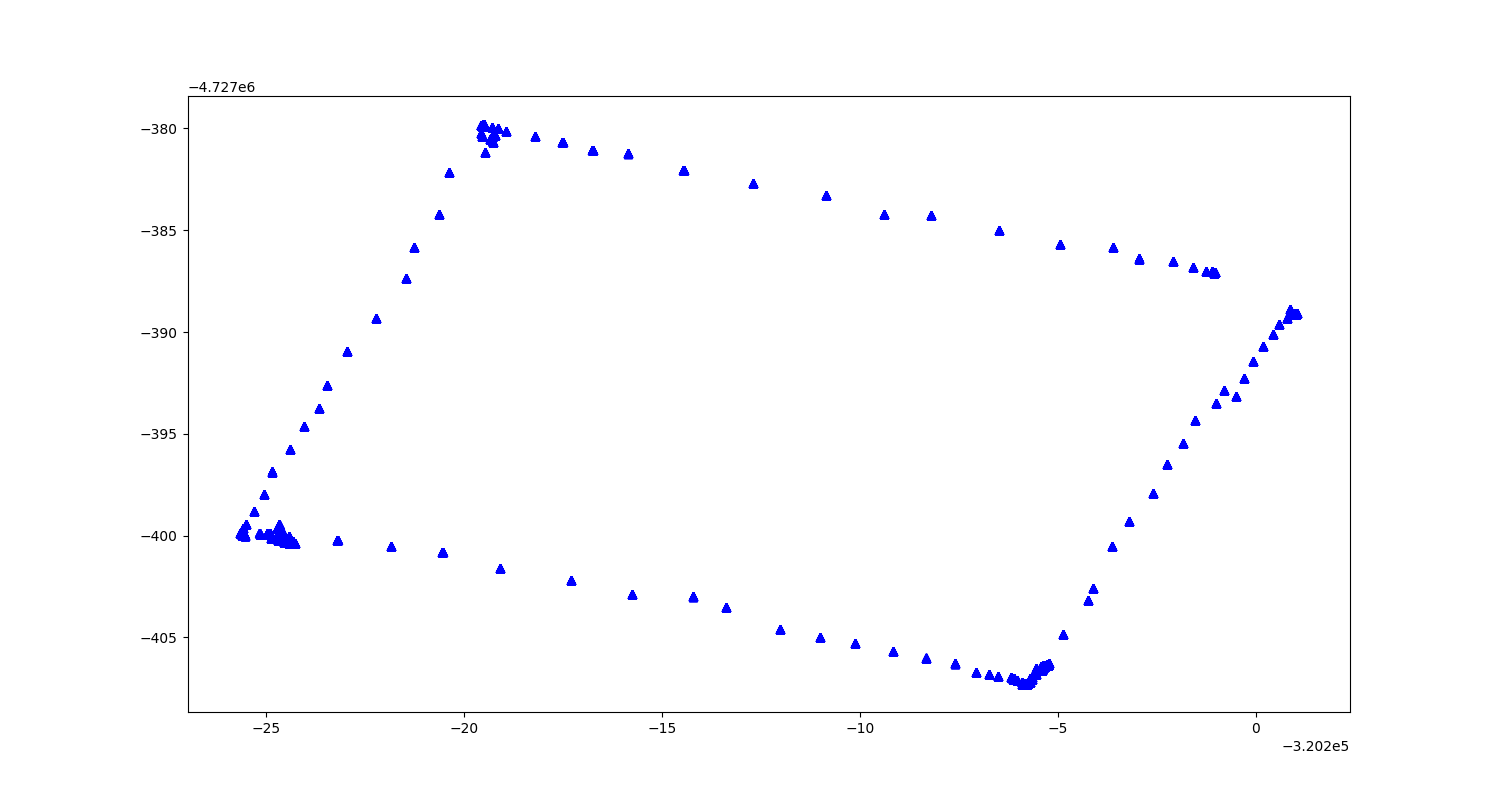

In [24]:
if True:
    plt.figure(5)
    plt.plot(VOx,VOy,'b^')
    plt.show()

In [14]:
#WHITE LINE 3D GRAPHING
#DISABLED
#if FLAG_other == True:
if False:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(lineslist_x, lineslist_y, lineslist_z, zdir='z', s=20, c='b')

In [15]:
#RED POINT 3D GRAPHING
#DISABLED
#if FLAG_other == True:
if False:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(redlist_x, redlist_y, redlist_z, zdir='z', s=20, c='b')

In [16]:
#BLUE POINT 3D GRAPHING
#DISABLED
#if FLAG_other == True:
if False:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(bluelist_x, bluelist_y, bluelist_z, zdir='z', s=20, c='b')